In [2]:
# City of Norfolk Employee Demographics API and Exploratory Data Analysis 

In [3]:
import pandas as pd 
from sodapy import Socrata

import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
client = Socrata("data.norfolk.gov", None)

In [5]:
# First 10,000 results returned from as JSON from API / converted to Python
# list of dictionaries by sodapy.

results = client.get("vv96-9m5c", limit = 10000)


In [6]:
# Convert to pandas DataFrame

results_df = pd.DataFrame.from_records(results)



In [7]:
results_df["state"] = "Virginia"

In [8]:
results_df.head()


,department,division,position_title,city,gender,ethnicity,education,veteran_status,startyear,birthyear,state
0,Human Services,Hum Svc Div of Social Services,Family Services Supervisor,Norfolk,Female,White,Not Indicated,Not Indicated,2012,1988,Virginia
1,Police,Police Administrative Svc-Civl,Operations Officer II,Norfolk,Female,Black,Not Indicated,Not Indicated,2013,1965,Virginia
2,Fire-Rescue,Fire-Rescue,Firefighter EMT-I,Norfolk,Male,White,Not Indicated,Not Indicated,2010,1989,Virginia
3,Fire-Rescue,Fire-Rescue,Fire Lieutenant,Norfolk,Male,White,Not Indicated,Not Indicated,2011,1985,Virginia
4,Fire-Rescue,Fire-Rescue,Firefighter EMT-P,Virginia Beach,Male,Black,Not Indicated,Not Indicated,2010,1986,Virginia


In [9]:
results_df.tail()

,department,division,position_title,city,gender,ethnicity,education,veteran_status,startyear,birthyear,state
4515,Sheriff and Jail,Judicial - Sheriff and Jail,Civilian Court Security,Chesapeake,Male,White,Associate Degree,Veteran,1971,1949,Virginia
4516,Clerk of the Circuit Court,Clerk of the Circuit Court,Chief Deputy Circuit Court,Norfolk,Male,White,Not Indicated,Veteran,1996,1955,Virginia
4517,Utilities,Utilities WasteWater,Equipment Operator III,Norfolk,Male,Black,HS Graduate or Equivalent,Veteran,2007,1959,Virginia
4518,Sheriff and Jail,Judicial - Sheriff and Jail,Secretary II,Virginia Beach,Male,White,Some College,Veteran,1978,1952,Virginia
4519,Human Services,Hum Svc Div of Social Services,Microcomputer Systems Analyst,Chesapeake,Male,Black,Bachelors Level Degree,Veteran,2014,1969,Virginia


In [10]:
results_df.shape

(4520, 11)

In [11]:
results_df.columns

Index(['department', 'division', 'position_title', 'city', 'gender',
       'ethnicity', 'education', 'veteran_status', 'startyear', 'birthyear',
       'state'],
      dtype='object')

In [12]:
pd.unique(results_df["department"])

array(['Human Services', 'Police', 'Fire-Rescue', 'City Treasurer',
       'City Council', 'Neighborhood Services', 'Sheriff and Jail',
       'Information Technology', 'City Manager',
       'Norfolk Community Services Board', 'Public Works',
       'Clerk of the Circuit Court', 'Resilience',
       'Budget and Strategic Planning', 'City Attorney',
       'Parks and Recreation',
       'Cultural Facilities, Arts and Entertainment', 'General Services',
       'Utilities', 'Elections', 'Commonwealths Attorney', 'Finance',
       'Housing and Community Development', 'Human Resources',
       'Fleet Management', 'Zoological Park', 'Libraries', nan,
       'Emergency Preparedness and Response', 'Cemeteries', 'Transit',
       'City Real Estate Assessor', 'City Planning', 'City Auditor',
       'Slover Library', 'Nauticus', 'Commissioner of the Revenue',
       'Economic Development', 'Public Health', 'Communications',
       'Norfolk Healthcare Consortium', 'Circuit Court Judges',
       '

In [13]:
# Unique counts for each column

results_df.nunique()

department         42
division          166
position_title    621
city               96
gender              2
ethnicity           8
education          12
veteran_status      3
startyear          55
birthyear          68
state               1
dtype: int64

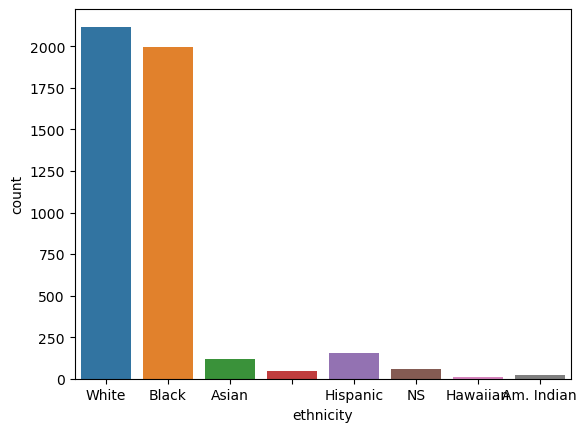

In [14]:
# Count plot of ethnicity

sns.countplot(x = "ethnicity", data = results_df)

plt.show()

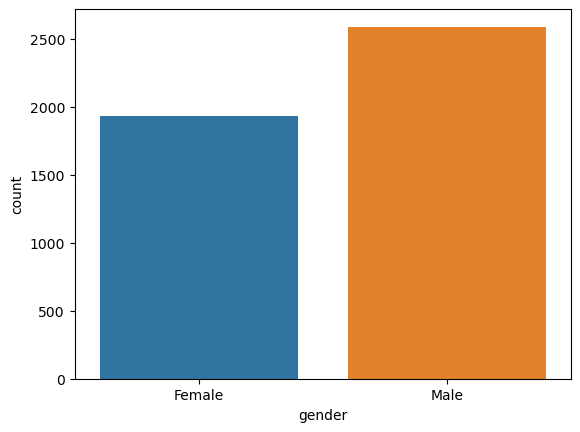

In [15]:
# Count of gender

sns.countplot(x = "gender", data = results_df)

plt.show()

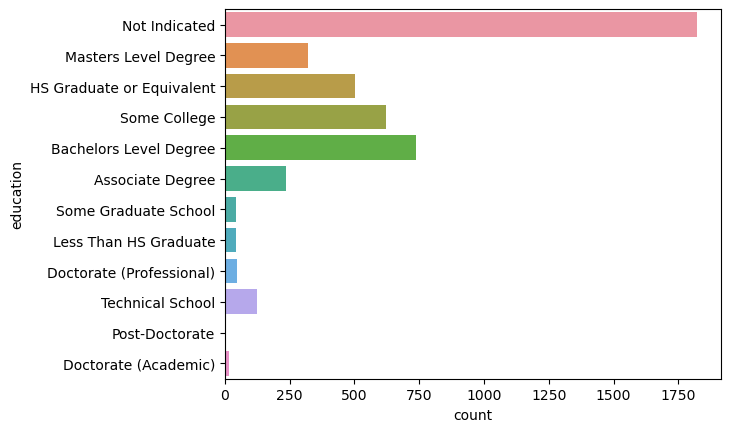

In [16]:
# Count of education

sns.countplot(y = "education", data = results_df)

plt.show()

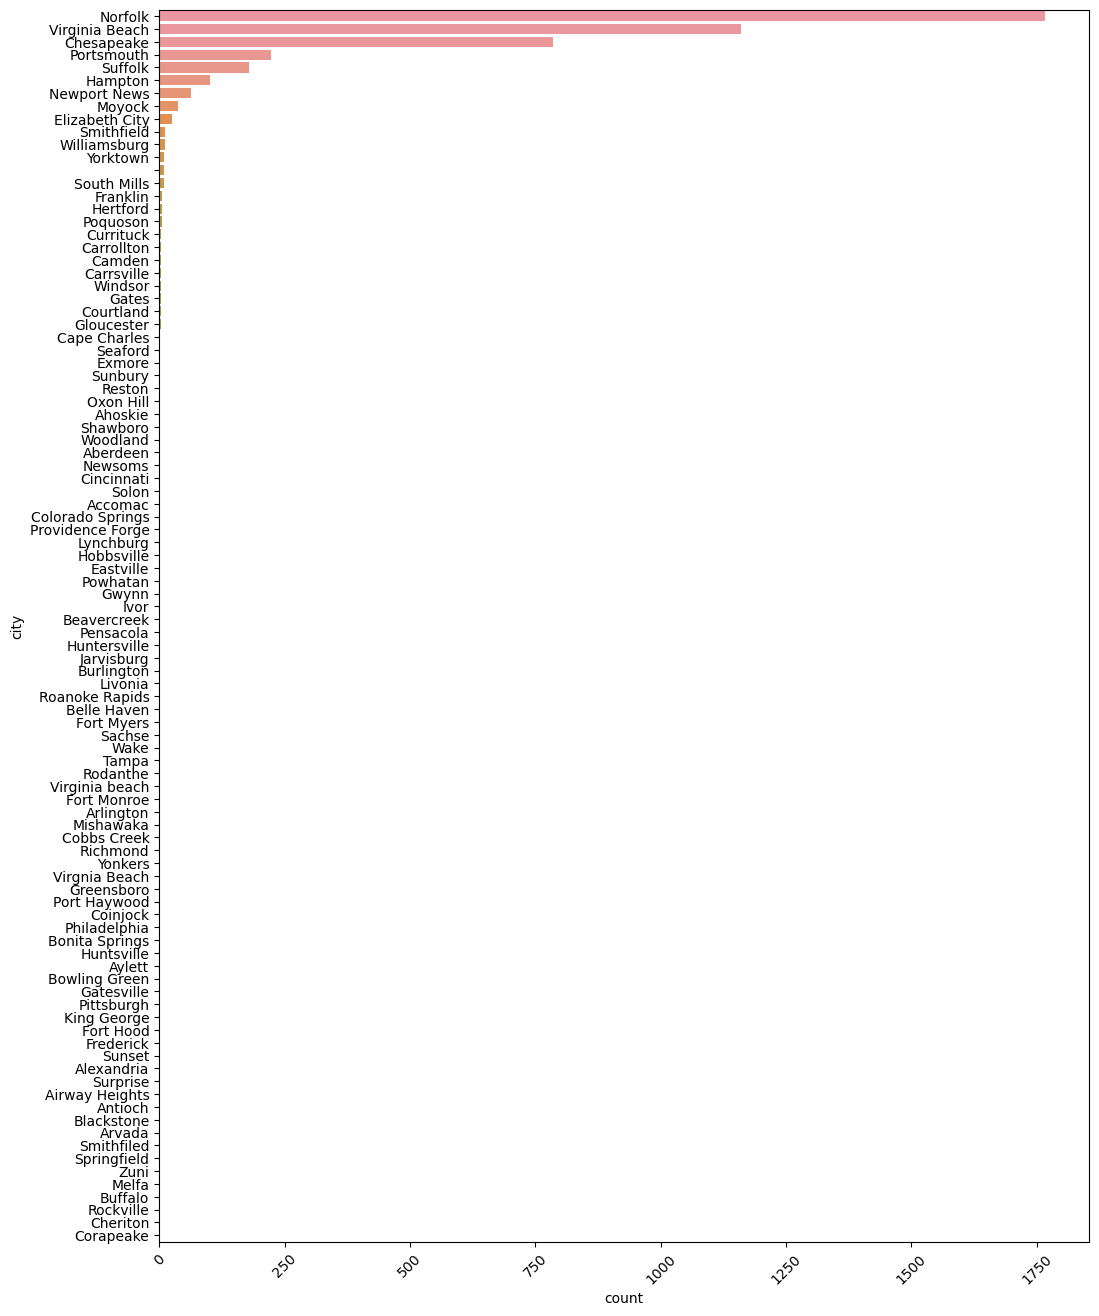

In [17]:
# One perennial issue is that city employees should work in the city they work. In this case, most City of Norfolk employee live in Norfolk, followed by
# Virginia Beach, Chespeake, Portsmouth and Suffolk. These are all surrounding cities. 

# Count of city in which employee live

 
fig, ax = plt.subplots(figsize = (12, 16))
sns.countplot(y = "city", data = results_df, ax = ax, order = results_df["city"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [18]:
# Summary statistics for the city column, a text data type

x = results_df["city"].describe()
print(x)

count        4520
unique         96
top       Norfolk
freq         1766
Name: city, dtype: object


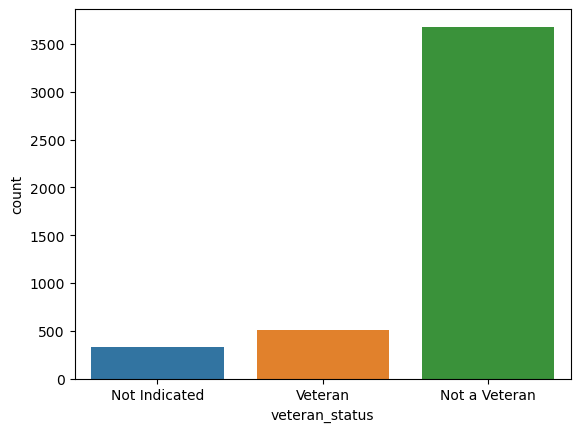

In [19]:
# Count of veteran status

sns.countplot(x = "veteran_status", data = results_df)
plt.show()

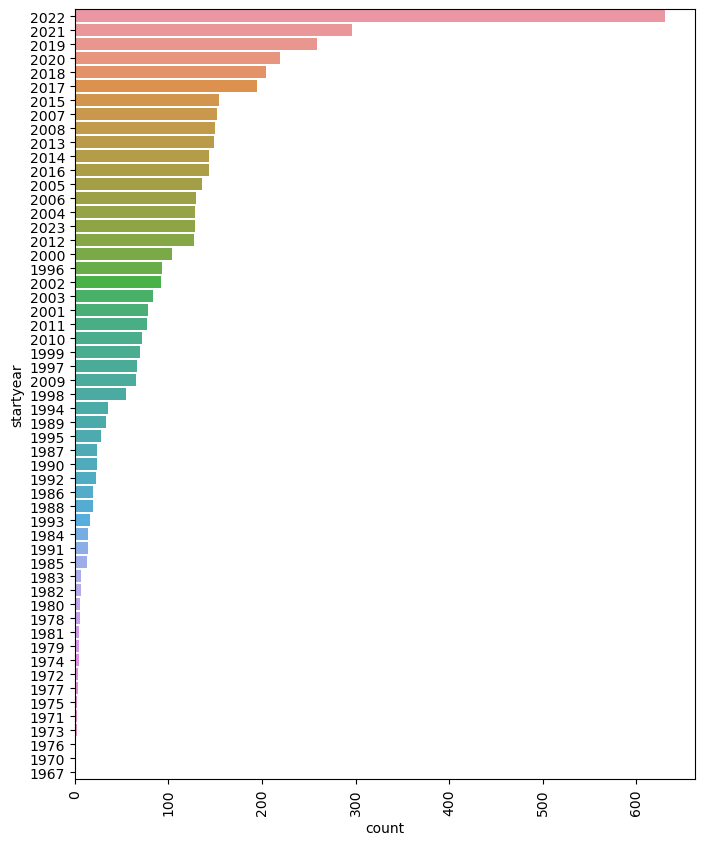

In [20]:
# Countplot of how many incumbents started employment in each year aka the start year. 

fig, ax = plt.subplots(figsize = (8, 10))
sns.countplot(y = "startyear", data = results_df, ax = ax, order = results_df["startyear"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

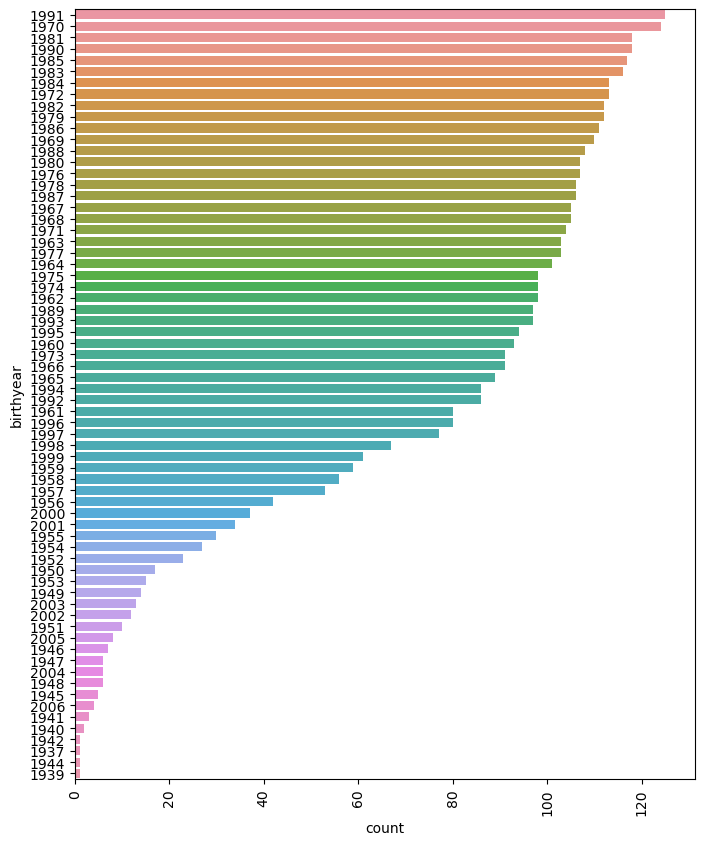

In [26]:
# Employee birth years - Interestingly the birth years around the turn of recent decades are some of the most common
# The top five years in order - 1991, 1970, 1981, 1990, 1985 -  were all years recessions occurred, inflation was higher than normal and/or 
# the unemployment rate was elevated. 

fig, ax = plt.subplots(figsize = (8, 10))
sns.countplot(y = "birthyear", data = results_df, ax = ax, order = results_df["birthyear"].value_counts().index)
plt.xticks(rotation = 90)
plt.show()